In [173]:
## Import the libraries as per the requirement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv("C://Users//RKG//Desktop//Preperation of WBS studies//globalrisetemperature//Global Temperatures- 1991-2016.csv", sep=',', engine='python')

In [120]:
df.describe()

,Temperature,Year
count,61152.000000,61152.000000
mean,19.224341,2003.500000
std,10.136194,7.500061
min,-30.860000,1991.000000
25%,13.820000,1997.000000
50%,23.320000,2003.500000
75%,26.240000,2010.000000
max,38.570000,2016.000000


In [121]:
df.count()

Temperature    61152
Year           61152
Statistics     61152
Month          61152
Month 1        61152
Month 2        61152
Country        61152
 ISO3          61152
dtype: int64

In [122]:
df.head()

,Temperature,Year,Statistics,Month,Month 1,Month 2,Country,ISO3
0,-0.03,1991,Jan Average,Jan,01-01-1991,1/1/1991,Afghanistan,AFG
1,1.44,1991,Feb Average,Feb,02-01-1991,2/1/1991,Afghanistan,AFG
2,6.89,1991,Mar Average,Mar,03-01-1991,3/1/1991,Afghanistan,AFG
3,12.94,1991,Apr Average,Apr,04-01-1991,4/1/1991,Afghanistan,AFG
4,17.08,1991,May Average,May,05-01-1991,5/1/1991,Afghanistan,AFG


In [123]:
df.drop(['Statistics','Month','Month 1'],axis=1, inplace=True)

In [124]:
df.head()

,Temperature,Year,Month 2,Country,ISO3
0,-0.03,1991,1/1/1991,Afghanistan,AFG
1,1.44,1991,2/1/1991,Afghanistan,AFG
2,6.89,1991,3/1/1991,Afghanistan,AFG
3,12.94,1991,4/1/1991,Afghanistan,AFG
4,17.08,1991,5/1/1991,Afghanistan,AFG


In [125]:
grouped_df = df.groupby("Year")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()

In [126]:
mean_df

,Year,Temperature
0,1991,18.802474
1,1992,18.742815
2,1993,18.720825
3,1994,19.028435
4,1995,19.026590
5,1996,18.718907
6,1997,19.008219
7,1998,19.363197
8,1999,19.164792
9,2000,19.161884


Let us look at the temperature distribution, ranges of different nations across our time period of interest

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

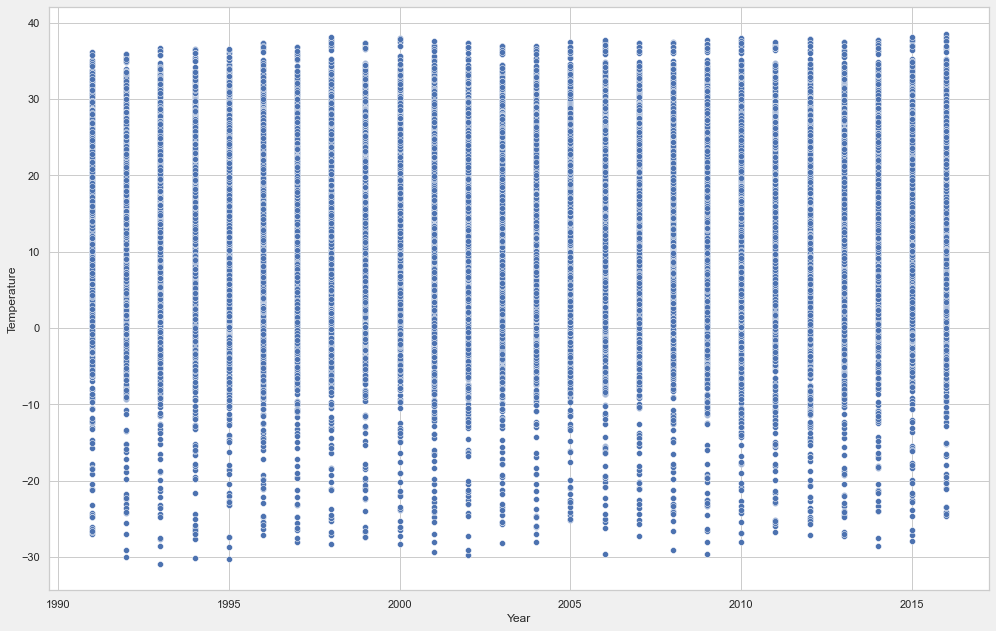

In [127]:
import seaborn
plt.figure(figsize=(15, 10))
seaborn.set(style='whitegrid')
seaborn.scatterplot(x=df['Year'],
                    y=df['Temperature'],
                    data=df)

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

<Figure size 1296x576 with 0 Axes>

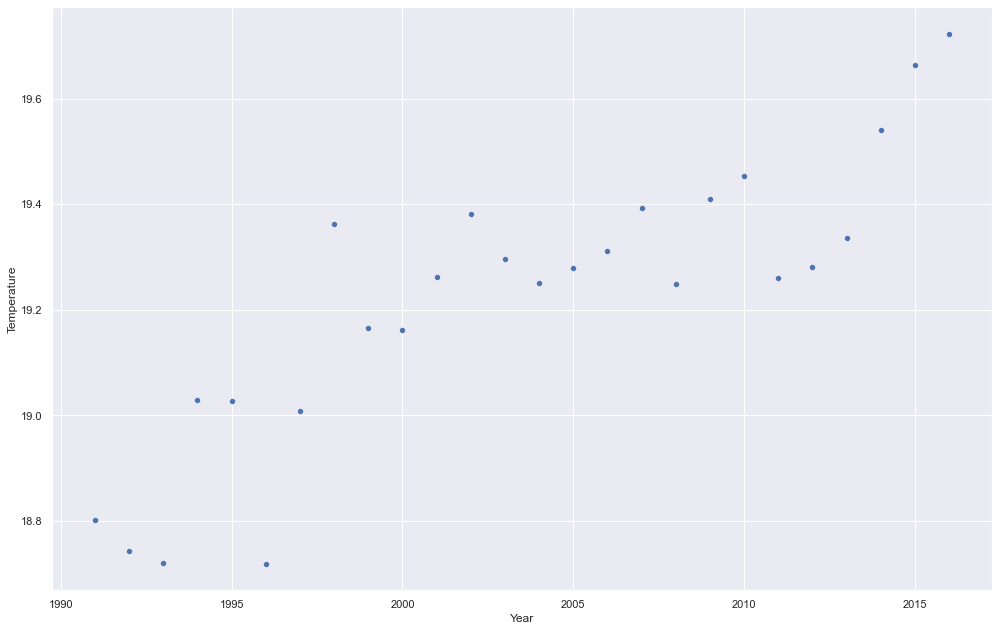

In [128]:
import seaborn
sns.set(style = "darkgrid")
fig = plt.figure()

plt.figure(figsize=(15, 10))

seaborn.scatterplot(x=mean_df['Year'],
                    y=mean_df['Temperature'],
                    data=mean_df ,  alpha=0.99)

## Avg global temperature over the years

In [129]:
import numpy as np
np.random.seed(1)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_df['Year'], y=mean_df['Temperature'],
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_layout(title='Average Global Temperatures',
                   xaxis_title='Year',
                   yaxis_title='Temperature (degrees C)')



In [130]:
from datetime import datetime
grouped_df2 = df.groupby("Month 2")
mean_df2 = grouped_df2.mean()
mean_df2 = mean_df2.reset_index()
mean_df2["Month 2"]= pd.to_datetime(mean_df2["Month 2"])
mean_df2 = mean_df2.sort_values(by="Month 2")

In [131]:
mean_df2.dtypes

Month 2        datetime64[ns]
Temperature           float64
Year                    int64
dtype: object

In [132]:
import numpy as np
np.random.seed(1)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_df2['Month 2'], y=mean_df2['Temperature'],
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_layout(title='Average Global Temperatures',
                   xaxis_title='Year',
                   yaxis_title='Temperature (degrees C)')

In [133]:
## Now lets run a time series model to understand how the temperature is increasing globally

In [134]:
mean_df2 = mean_df2.set_index('Month 2')
mean_df2.index

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Month 2', length=312, freq=None)

In [135]:
mean_df2.drop(['Year'],axis = 1,inplace = True)

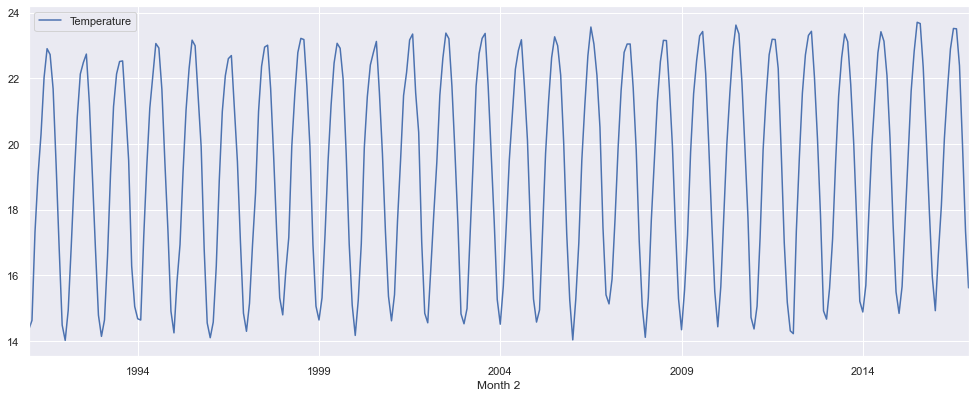

In [136]:
y=mean_df2
y.plot(figsize=(15, 6))
plt.show()

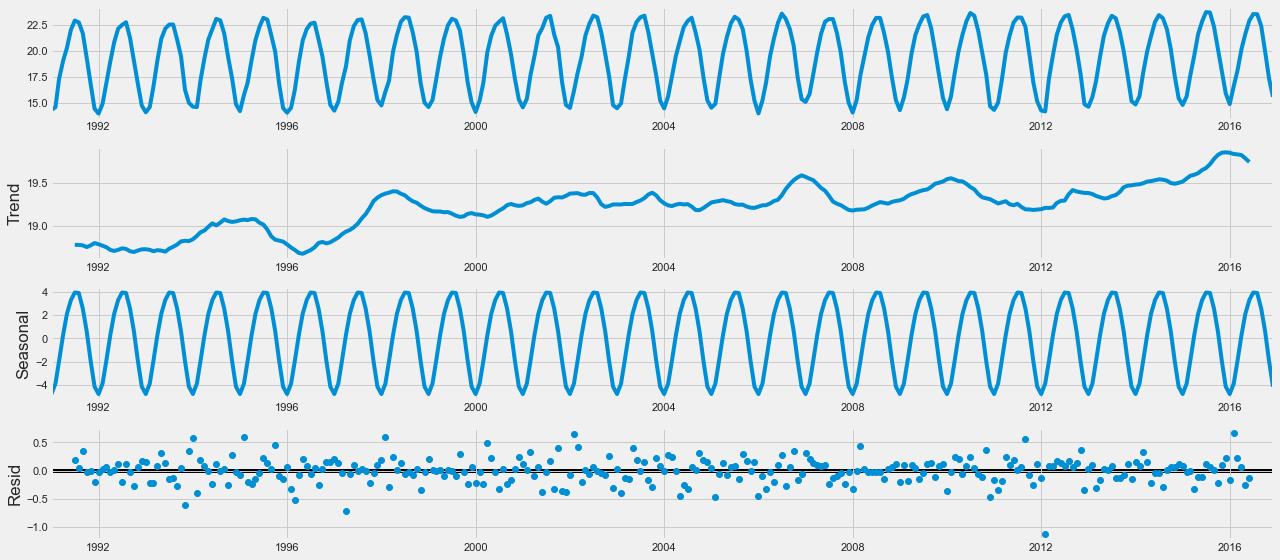

In [137]:
## Plot charts to evaluate seasonality, trend, as well as residuals of our time series

from pylab import rcParams
import statsmodels.api as sm
import itertools
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [138]:
## Choose the best attributes to consume in time series model

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [139]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provid

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2731.81227070089
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2266.27132930012
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:296.6002021985961


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:180.02001201910133
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:297.4146682278492


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:137.37568115151672
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:225.19251285759785


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:180.40913985769555
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2309.633315306945


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1870.9898016541933
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:279.0104988155623


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:143.81068695248834


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:301.66316825328215


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:314.1306029259167
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:193.43301930666945


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:143.10642574205386
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1196.0410216249336
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:902.9051857684262


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:404.68742357008523


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:200.43034675046016
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:402.2330446629378


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:215.48961227673135
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:280.41234264017


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:193.7350851751529
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:954.5615517349729


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:801.853939888223
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:278.781942312177


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:87.45776920130629
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:282.6461668358209


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:97.58079862579933
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:180.7613460452045


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:88.82582721645358
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1200.401396840427


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:907.1542943651983
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:274.7616828797789


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:126.96048234164414


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:275.8131957019191


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:101.8038029144117
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:180.02438566195138


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:122.2862831905037
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:962.0236388124513


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:807.8175311130849
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:259.9770451104917


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:85.66809123804191


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:279.49746577168884


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:108.51921933925487
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:163.0638684147288


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:84.91587844655317
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:880.5409346547578


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:743.3810377162363
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:333.57375786635384


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:137.3427778953306
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:332.66092347799537


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:151.51055540039502
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:220.42551573495282


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:136.51440214861162
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:822.9997150984783


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:735.1474578725364
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:280.77924759411883


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:88.27754569032643


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:282.3353431632213


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:97.94906871658308


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:182.5545895513211


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:88.28953589345761


In [140]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

## Change the p, q, d values until the P > |z| comes as significant enough to reject the null hypothesis (Null = ma/ar are insignificant)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6697      0.046    -14.642      0.000      -0.759      -0.580
ar.S.L12      -0.5310      0.044    -12.093      0.000      -0.617      -0.445
sigma2         0.1074      0.009     11.828      0.000       0.090       0.125


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



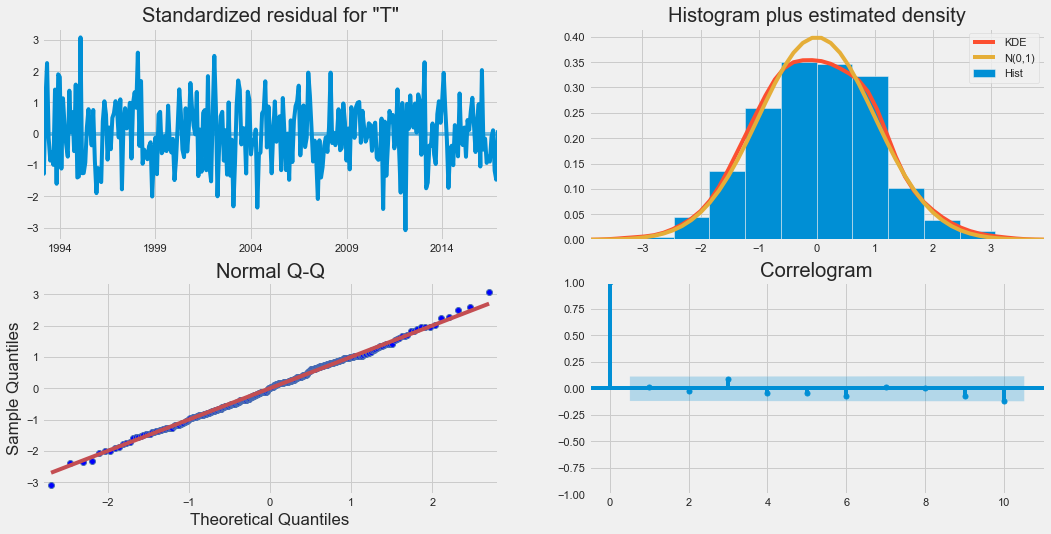

In [141]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## From here we are trying to see that residuals have ~0 mean and constant variance. This is evident from the residual plot (uniform throughout and no trend) and also the Histogram which seems to have a good 

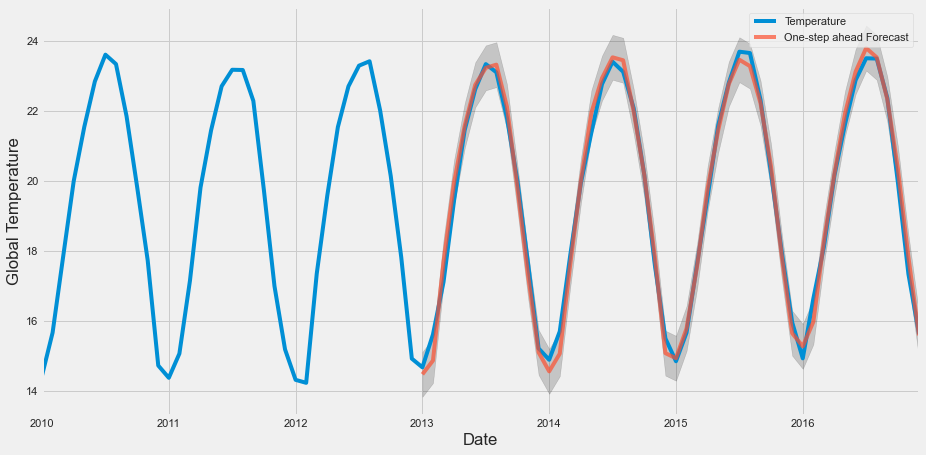

In [142]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Global Temperature')
plt.legend()
plt.show()

## This method (dynamic = False) trains the model until the previous point and predicts the next point

In [143]:
## Lets just check the accuracy by dividing the dataset into train and test instead of looking at test train data
## We will use another method to forecast... train test split and then foreacast

In [144]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = y.iloc[:280]
test = y.iloc[280:]

In [145]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_2 = mod.fit()
print(results_2.summary().tables[1])

## Change the p, q, d values until the P > |z| comes as significant enough to reject the null hypothesis (Null = ma/ar are insignificant)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6678      0.049    -13.610      0.000      -0.764      -0.572
ar.S.L12      -0.5345      0.046    -11.575      0.000      -0.625      -0.444
sigma2         0.1115      0.010     11.069      0.000       0.092       0.131


C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\RKG\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [146]:
# Forecast
result_3 = results_2.forecast(len(test), alpha=0.05)  # 95% conf
result_3

2014-05-01    21.967675
2014-06-01    23.135674
2014-07-01    23.788187
2014-08-01    23.746552
2014-09-01    22.388586
2014-10-01    20.542446
2014-11-01    18.198618
2014-12-01    15.515817
2015-01-01    15.230853
2015-02-01    16.112285
2015-03-01    17.937848
2015-04-01    20.143689
2015-05-01    22.157597
2015-06-01    23.327592
2015-07-01    24.016775
2015-08-01    23.872227
2015-09-01    22.544752
2015-10-01    20.713129
2015-11-01    18.365511
2015-12-01    15.815182
2016-01-01    15.508574
2016-02-01    16.352781
2016-03-01    18.377001
2016-04-01    20.501266
2016-05-01    22.519669
2016-06-01    23.688597
2016-07-01    24.358181
2016-08-01    24.268638
2016-09-01    22.924866
2016-10-01    21.085484
2016-11-01    18.739891
2016-12-01    16.118759
Freq: MS, Name: predicted_mean, dtype: float64

In [147]:
result_3.dtype

dtype('float64')

In [148]:
result_4 = pd.DataFrame(result_3)

In [149]:
result_4.reset_index()
result_4=result_4.rename(columns={"index": "Month","predicted_mean":"Temperature"})


In [150]:
result_4

,Temperature
2014-05-01,21.967675
2014-06-01,23.135674
2014-07-01,23.788187
2014-08-01,23.746552
2014-09-01,22.388586
2014-10-01,20.542446
2014-11-01,18.198618
2014-12-01,15.515817
2015-01-01,15.230853
2015-02-01,16.112285


In [151]:
test

,Temperature
Month 2,
2014-05-01,21.398827
2014-06-01,22.774286
2014-07-01,23.416480
2014-08-01,23.128265
2014-09-01,22.081173
2014-10-01,20.180306
2014-11-01,17.595969
2014-12-01,15.494592
2015-01-01,14.841429


<AxesSubplot:xlabel='Month 2', ylabel='Temperature'>

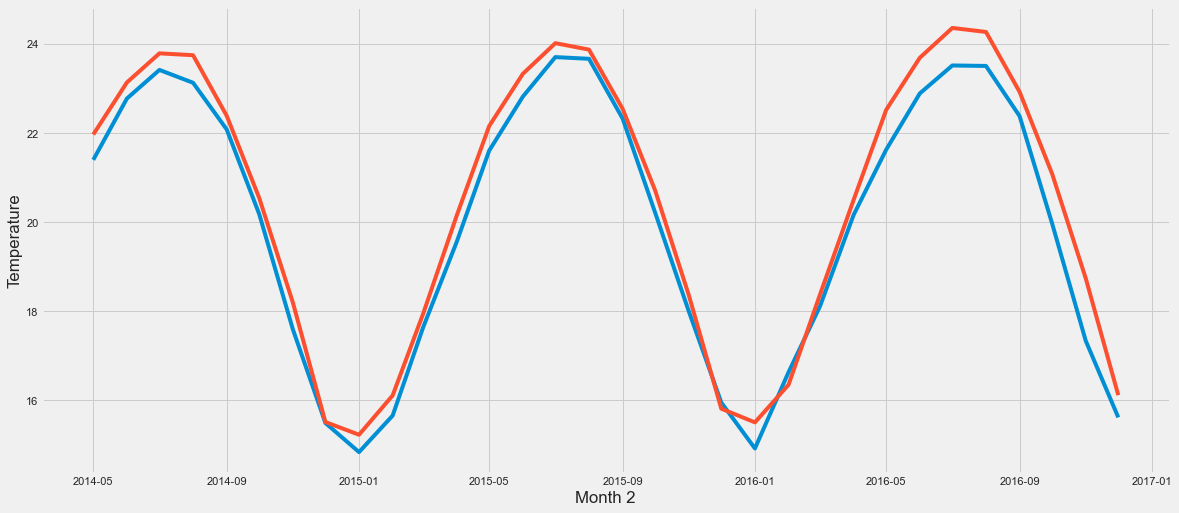

In [152]:
sns.lineplot(data=test, x="Month 2", y="Temperature")
sns.lineplot(data=result_4,  y="Temperature", x=result_4.index)


## Note that the above implementation doesnt include removing trends and seasonsility from the dataset so that it becomes stationary. 

## We have just removed seasonality in ARIMA using d=1. This may reduce seasonality. Better ways to remove trends/seasonality include taking log of the series and then differencing the series. The amount of stationarity can be found using dickey fuller test (null hypothesis = no stationarity)...

In [153]:
## Lets visualize the global temperatures on the map

In [154]:
df

,Temperature,Year,Month 2,Country,ISO3
0,-0.03,1991,1/1/1991,Afghanistan,AFG
1,1.44,1991,2/1/1991,Afghanistan,AFG
2,6.89,1991,3/1/1991,Afghanistan,AFG
3,12.94,1991,4/1/1991,Afghanistan,AFG
4,17.08,1991,5/1/1991,Afghanistan,AFG
...,...,...,...,...,...
61147,18.76,2016,8/1/2016,Zimbabwe,ZWE
61148,22.99,2016,9/1/2016,Zimbabwe,ZWE
61149,25.87,2016,10/1/2016,Zimbabwe,ZWE
61150,25.85,2016,11/1/2016,Zimbabwe,ZWE


In [155]:
df2=df[df['Year']==2016]

In [156]:
df2

,Temperature,Year,Month 2,Country,ISO3
300,3.57,2016,1/1/2016,Afghanistan,AFG
301,4.35,2016,2/1/2016,Afghanistan,AFG
302,8.87,2016,3/1/2016,Afghanistan,AFG
303,14.43,2016,4/1/2016,Afghanistan,AFG
304,20.37,2016,5/1/2016,Afghanistan,AFG
...,...,...,...,...,...
61147,18.76,2016,8/1/2016,Zimbabwe,ZWE
61148,22.99,2016,9/1/2016,Zimbabwe,ZWE
61149,25.87,2016,10/1/2016,Zimbabwe,ZWE
61150,25.85,2016,11/1/2016,Zimbabwe,ZWE


In [157]:
grouped_df = df2.groupby("Country")

In [158]:
grouped_df

In [159]:
mean_df_3 = grouped_df.mean()
mean_df_3.head()

,Temperature,Year
Country,,
Afghanistan,14.515000,2016
Albania,12.722500,2016
Algeria,24.066667,2016
Andorra,12.441667,2016
Angola,22.555000,2016


In [160]:
mean_df_3=mean_df_3.reset_index()
mean_df_3

,Country,Temperature,Year
0,Afghanistan,14.515000,2016
1,Albania,12.722500,2016
2,Algeria,24.066667,2016
3,Andorra,12.441667,2016
4,Angola,22.555000,2016
...,...,...,...
190,Venezuela,26.478333,2016
191,Vietnam,25.072500,2016
192,Yemen,24.220833,2016
193,Zambia,22.736667,2016


In [161]:
mean_df_3=mean_df_3.drop('Year',axis=1)

In [162]:
mean_df_3

,Country,Temperature
0,Afghanistan,14.515000
1,Albania,12.722500
2,Algeria,24.066667
3,Andorra,12.441667
4,Angola,22.555000
...,...,...
190,Venezuela,26.478333
191,Vietnam,25.072500
192,Yemen,24.220833
193,Zambia,22.736667


In [163]:
countries = mean_df_3.Country.unique()
countries = countries.tolist()

In [164]:
import plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [165]:
data = dict(type='choropleth',
            locations = countries,
            locationmode = 'country names',
            colorscale = 'Reds',
            text = mean_df_3['Country'],
            z = mean_df_3['Temperature'],
            colorbar = {'title':"Temperature"}
            )

In [166]:
layout = dict(title = 'Global mean temperature in 2016',
              geo = dict(scope='world')
             )

In [167]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [168]:
import plotly.express as px
import pandas as pd

In [169]:
grouped_df = df.groupby(["Country","Year"])
mean_df_4 = grouped_df.mean()
mean_df_4=mean_df_4.reset_index()

In [170]:
mean_df_4

,Country,Year,Temperature
0,Afghanistan,1991,12.896667
1,Afghanistan,1992,12.545000
2,Afghanistan,1993,12.976667
3,Afghanistan,1994,13.080000
4,Afghanistan,1995,13.040833
...,...,...,...
5065,Zimbabwe,2012,21.910833
5066,Zimbabwe,2013,21.625833
5067,Zimbabwe,2014,21.710000
5068,Zimbabwe,2015,22.327500


In [171]:
mean_df_4.head()

,Country,Year,Temperature
0,Afghanistan,1991,12.896667
1,Afghanistan,1992,12.545000
2,Afghanistan,1993,12.976667
3,Afghanistan,1994,13.080000
4,Afghanistan,1995,13.040833


Lets create a dynamic map with temperatures change reflecting on the map in form of animation

In [172]:
px.choropleth(mean_df_4, 
              locations = mean_df_4['Country'],
              color= mean_df_4['Temperature'], 
              animation_frame=mean_df_4['Year'],
              color_continuous_scale="Inferno",
              locationmode='country names',
              scope="world",
              range_color=(0, 20),
              title='Average Temperature',
              height=600
             )